In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set(color_codes=True)

In [3]:
wcd = pd.read_csv('Wholesale+Customers+Data.csv')

In [5]:
wcd

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
wcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
wcd.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [18]:
wcd.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
Sum                 0
dtype: int64

In [19]:
wcd.count()

Buyer/Spender       440
Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicatessen        440
Sum                 440
dtype: int64

In [10]:
wcd['Sum'] = wcd ['Fresh']+ wcd['Milk']+wcd['Grocery']+wcd['Frozen']+wcd['Detergents_Paper']+wcd['Delicatessen']

In [11]:
wcd

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [12]:
Reg= wcd.groupby("Region")

In [13]:
wcd.groupby("Region").sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [14]:
Cha = wcd.groupby("Channel")

In [15]:
wcd.groupby("Channel").sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


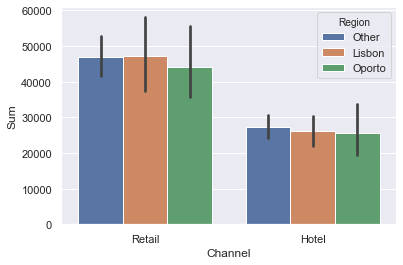

In [20]:
sns.barplot(wcd['Channel'], wcd['Sum'], hue=wcd['Region'])

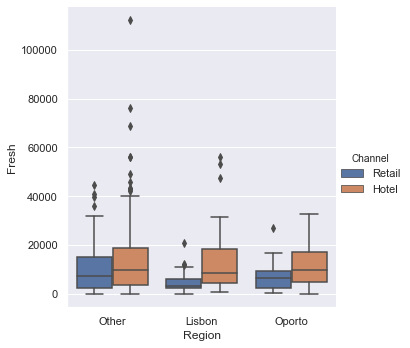

In [17]:
sns.catplot(x="Region", y = "Fresh",hue="Channel",data=wcd, kind="box")

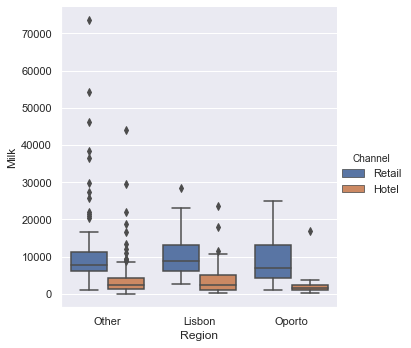

In [22]:
sns.catplot(x="Region", y = "Milk",hue="Channel", data=wcd, kind="box")

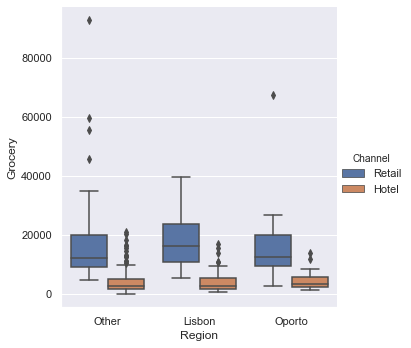

In [101]:
sns.catplot(x="Region", y = "Grocery",hue="Channel", data=wcd, kind="box")


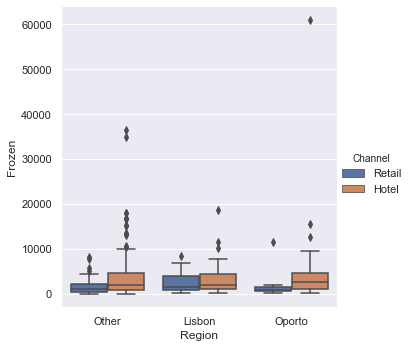

In [23]:
sns.catplot(x="Region", y = "Frozen",hue="Channel", data=wcd, kind="box")


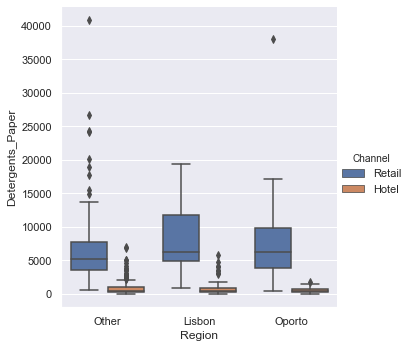

In [103]:
sns.catplot(x="Region", y = "Detergents_Paper",hue="Channel", data=wcd, kind="box")


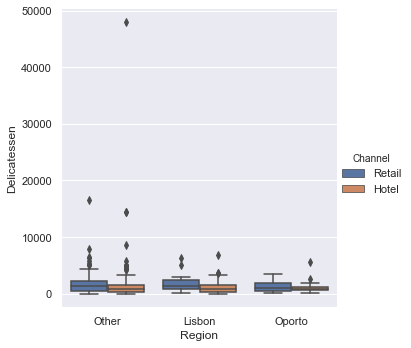

In [104]:
sns.catplot(x="Region", y = "Delicatessen",hue="Channel", data=wcd, kind="box")

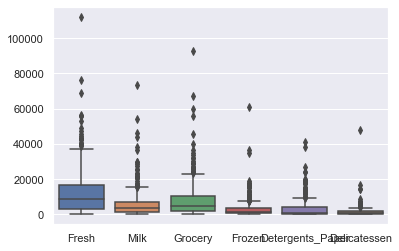

In [94]:
fig.set_size_inches(1000, 500)
sns.boxplot(data=wcd[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] ,
                orient = "v" )

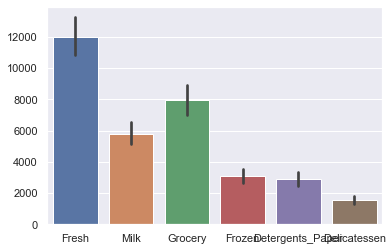

In [88]:
fig.set_size_inches(60, 40)
sns.barplot(data=wcd[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] ,
                orient = "v" )